In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
exp_dataset = pd.read_csv("expanded_heating.csv")
exp_dataset.rename(columns={'Unnamed: 0':'newname'}, inplace=True)
heating = exp_dataset.drop('newname', axis = 1)

In [3]:
heating.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X1_3,X2_3,...,X56,X57,X58,X66,X67,X68,X77,X78,X88,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.941192,1.361934e+08,...,14.0,0.0,0.0,4,0.0,0,0.0,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.941192,1.361934e+08,...,21.0,0.0,0.0,9,0.0,0,0.0,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.941192,1.361934e+08,...,28.0,0.0,0.0,16,0.0,0,0.0,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.941192,1.361934e+08,...,35.0,0.0,0.0,25,0.0,0,0.0,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.729000,1.789294e+08,...,14.0,0.0,0.0,4,0.0,0,0.0,0.0,0,20.84


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
Y = heating['Y1']
X = heating.drop('Y1',axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
pd.DataFrame(zip(X.columns,lm.coef_),columns =['features','estimatedcoefficients'])

,features,estimatedcoefficients
0,X1,0.049170
1,X2,-17.022509
2,X3,-16.942360
3,X4,-0.040074
4,X5,0.008771
5,X6,-0.210937
6,X7,145.524825
7,X8,0.365842
8,X1_3,0.230564
9,X2_3,0.000014


In [6]:
mse = np.mean((Y_test - lm.predict(X_test))**2) 
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.59104626569


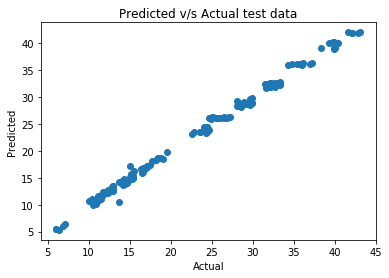

In [7]:
plt.scatter(Y_test,lm.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual test data")
plt.show()

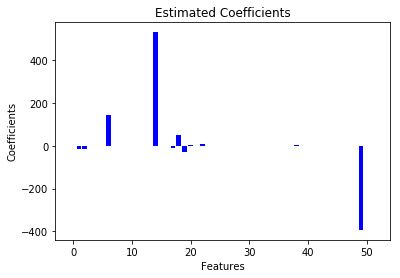

In [8]:
coef = lm.coef_
N = len(coef)
x = range(N)
plt.bar(x,coef,color='blue')
plt.title('Estimated Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [9]:
mse = np.mean((Y_train - lm.predict(X_train))**2) 
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
0.490145255958


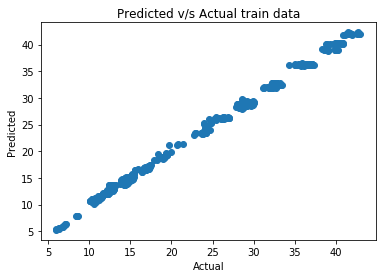

In [10]:
plt.scatter(Y_train,lm.predict(X_train))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted v/s Actual train data")
plt.show()

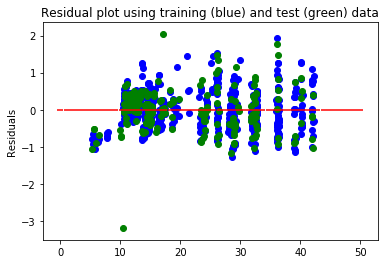

In [11]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
plt.scatter(pred_train, pred_train - Y_train, c = 'b')
plt.scatter(pred_test, pred_test - Y_test, c = 'g')
plt.scatter(np.linspace(0,50),np.zeros(shape = 50), c = 'r', marker = '_')
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [15]:
Y = np.log(heating['Y1'].values)
X_train, X_test, Y_train_trans, Y_test_trans = train_test_split(X,Y)
lm.fit(X_train, Y_train_trans)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
pred_train_trans = lm.predict(X_train)
mse = np.mean((Y_train_trans - pred_train_trans)**2)
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
0.0264104583912


In [17]:
pred_test_trans = lm.predict(X_test)
mse = np.mean((Y_test_trans - pred_test_trans)**2)
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.0383251428795
